In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fix the data, not the figure
## pydata lightning talk October 2019

martin@pythonforbiologists.com

This should run with pandas/seaborn installed. Please forgive the many pandas bad habits in the code; it was prepared during lunch on the day.

Our dataset: olympic medal numbers in swimming and athletics:

In [279]:
# code to read/reshape/filter data

data = (
    pd.read_csv("https://raw.githubusercontent.com/mojones/binders/master/olympics.csv", sep="\t")
    .groupby(['Sport', 'Country']).size().to_frame('med_no').reset_index()
    .rename(columns = {'Country' : 'ori'})
)
data = data[data['Sport'].isin(['Aquatics', 'Athletics'])]
data = data.groupby(['Sport', 'ori'])['med_no'].first().unstack(0).reset_index().fillna(0)
data.columns='ori sw at'.split(' ')
data

,ori,sw,at
0,Algeria,0.0,6.0
1,Argentina,3.0,5.0
2,Australasia,11.0,1.0
3,Australia,354.0,81.0
4,Austria,15.0,7.0
5,Bahamas,0.0,19.0
6,Barbados,0.0,1.0
7,Belarus,0.0,19.0
8,Belgium,53.0,14.0
9,Bohemia,0.0,1.0


## Example one: incorrect column names

Plot the first ten rows as a bar chart:

Text(0.5, 1, 'Number of medals per country in athletics')

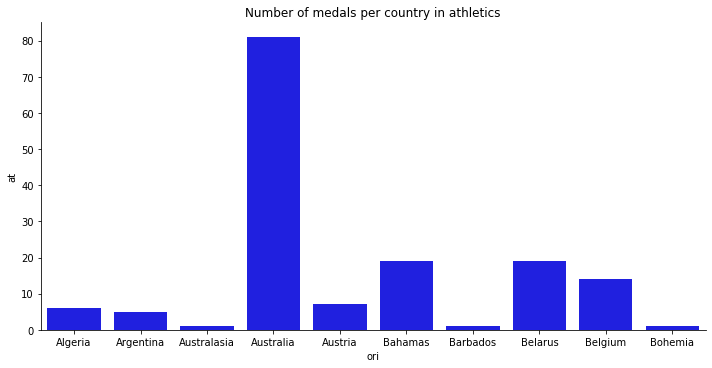

In [280]:
sns.catplot(
    data=data.head(10),
    x = 'ori',
    y = 'at',
    kind = 'bar',
    aspect = 2,
    height = 5,
    color = 'blue'
)
plt.title("Number of medals per country in athletics")

Not too bad, but the axis labels are terrible. Let's fix them. Option one: fix the chart:

Text(10.049999999999997, 0.5, 'Total swimming medals')

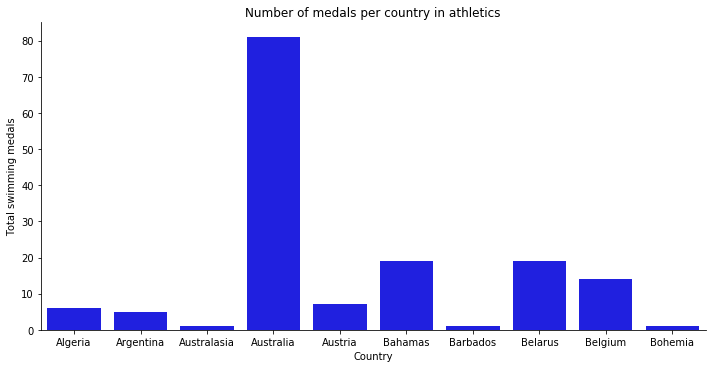

In [281]:
sns.catplot(
    data=data.head(10),
    x = 'ori',
    y = 'at',
    kind = 'bar',
    aspect = 2,
    height = 5,
    color = 'blue'
)
plt.title("Number of medals per country in athletics")
plt.xlabel('Country')
plt.ylabel('Total swimming medals')

Option two: fix the data table:

In [282]:
data.rename(columns = {'ori' : 'Country', 'sw' : 'Total swimming medals', 'at' : 'Total athletics medals'}, inplace=True)
data

,Country,Total swimming medals,Total athletics medals
0,Algeria,0.0,6.0
1,Argentina,3.0,5.0
2,Australasia,11.0,1.0
3,Australia,354.0,81.0
4,Austria,15.0,7.0
5,Bahamas,0.0,19.0
6,Barbados,0.0,1.0
7,Belarus,0.0,19.0
8,Belgium,53.0,14.0
9,Bohemia,0.0,1.0


This fixes our original figure:

Text(0.5, 1, 'Number of medals per country in athletics')

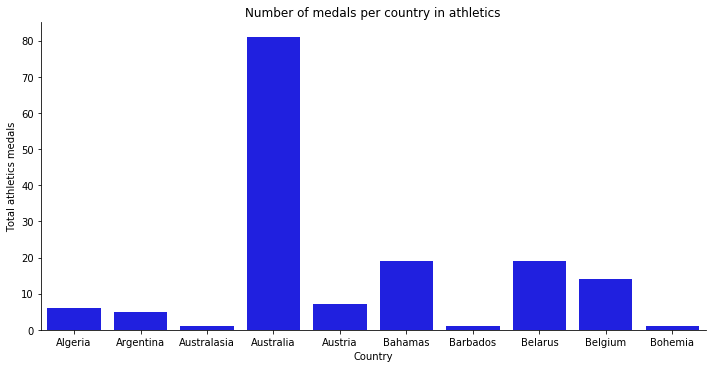

In [315]:
sns.catplot(
    data=data.head(10),
    x = 'Country',
    y = 'Total athletics medals',
    kind = 'bar',
    aspect = 2,
    height = 5,
    color = 'blue'
)
plt.title("Number of medals per country in athletics")

As a bonus, the code is clearer, and we fix all future figures:

Text(0.5, 1, 'Number of medals in swimming vs. athletics')

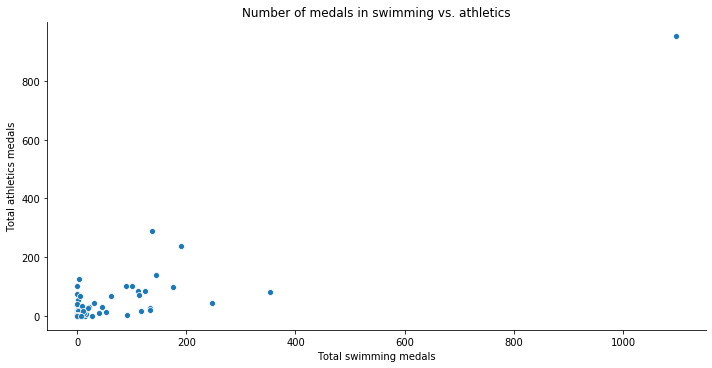

In [301]:
sns.relplot(
    data=data,
    x = 'Total swimming medals',
    y = 'Total athletics medals',
    aspect = 2,
    height = 5,
    #color = 'blue'
)
plt.title("Number of medals in swimming vs. athletics")

And tables:

In [289]:
# 10 countries with most athletics medals
data.sort_values('Total athletics medals', ascending=False).head(10)

,Country,Total swimming medals,Total athletics medals
91,United States,1096.0,952.0
90,United Kingdom,138.0,289.0
74,Soviet Union,190.0,238.0
28,East Germany,144.0,139.0
34,Finland,4.0,127.0
79,Sweden,101.0,103.0
44,Jamaica,0.0,101.0
35,France,89.0,100.0
36,Germany,175.0,99.0
67,Russia,125.0,83.0


## Example two: outliers

Say we have a dataset with outliers (real or artefactual). Like our medals:

Text(0.5, 1, 'Number of medals in swimming vs. athletics')

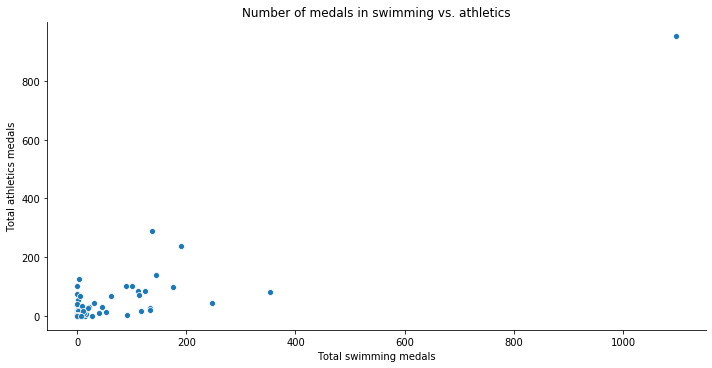

In [293]:
sns.relplot(
    data=data,
    x = 'Total swimming medals',
    y = 'Total athletics medals',
    aspect = 2,
    height = 5,
)
plt.title("Number of medals in swimming vs. athletics")

This will make it hard to interpret charts as the scale compresses most of the data

We'd like to just look at the non-outlier countries. Option one: change the limits on the chart:

(0, 400)

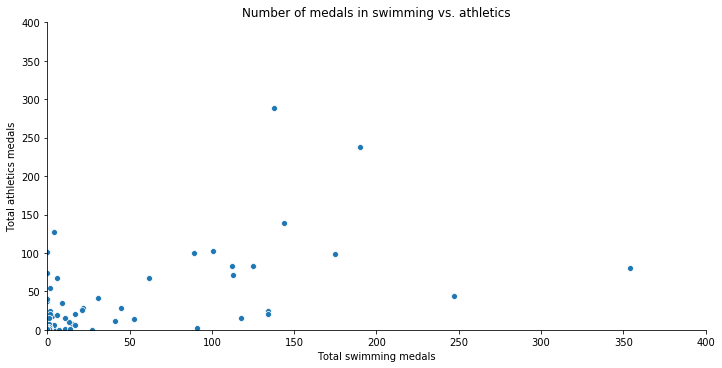

In [296]:
sns.relplot(
    data=data,
    x = 'Total swimming medals',
    y = 'Total athletics medals',
    aspect = 2,
    height = 5,
)
plt.title("Number of medals in swimming vs. athletics")

plt.ylim(0,400)
plt.xlim(0,400)

Option two: filter the data:

In [297]:
non_outliers = data[data['Total swimming medals'] < 400]

Now we can plot the chart with the filtered dataset:

Text(0.5, 1, 'Number of medals in swimming vs. athletics')

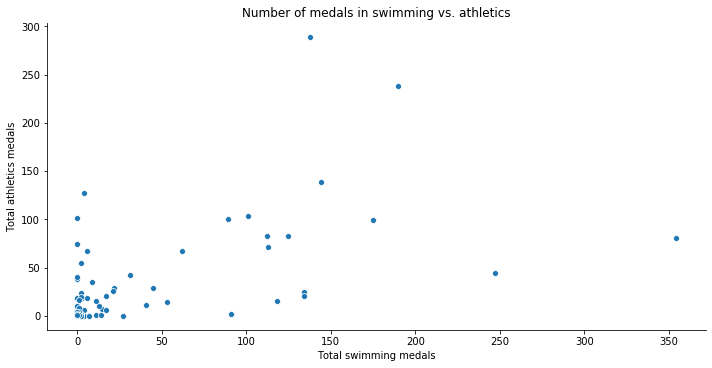

In [302]:
sns.relplot(
    data=non_outliers,
    x = 'Total swimming medals',
    y = 'Total athletics medals',
    aspect = 2,
    height = 5,
)
plt.title("Number of medals in swimming vs. athletics")

But also re-use our non-outlier dataset:

In [300]:
from scipy.stats import linregress
linregress(
    non_outliers['Total swimming medals'],
    non_outliers['Total athletics medals']
).pvalue

3.2042077904341823e-10